# Case study 03 (Week 07)

## **Description**

***Case Study on Correlation and Regression***

A textile company regularly spent money on five advertisingcompanies for their ads.(Dataset added along with)

1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies andprofit generated.

2. Build a regression model to predict the profit from the given data and comment your findings on it.

3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

    | Adv. Company | Target expenditure (In thousands) |
    | :---         |               :---:               |
    | Adv01        |                290                |
    | Adv02        |                312                |
    | Adv03        |                309                |
    | Adv04        |                298                |
    | Adv05        |                320                |

## Q1. Check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

In [3]:
# NumPy Library as np
import numpy as np
# Pandas Library as 'pd'
import pandas as pd
# Matplot Library - PyPlot as plt
import matplotlib.pyplot as plt
# Seaborn Library as 'sns'
import seaborn as sns

In [4]:
# Writing the Dataset from the csv file to Pandas Dataframe named 'AD_DATA'
AD_DATA = pd.read_csv('Add_sales_data_2018.csv')

In [98]:
# Displaying 10 random entries in the Dataframe
AD_DATA.sample(10)

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
24,2018-08-30,235.35,237.30,232.10,237.30,236.00,4435.174
38,2018-08-08,237.25,240.50,235.05,236.35,236.35,4486.380
86,2018-06-01,269.70,269.70,258.55,265.10,263.25,5015.536
14,2018-09-14,223.45,236.70,223.30,234.00,233.95,4379.901
21,2018-09-04,238.20,238.20,222.60,223.45,223.70,4390.996
126,2018-04-05,274.55,277.00,271.50,273.00,273.00,5172.760
138,2018-03-16,280.80,282.70,271.05,272.55,272.40,5247.011
176,2018-01-18,315.05,315.75,301.40,304.50,305.45,5858.340
134,2018-03-22,264.65,264.65,257.60,259.10,258.85,4934.682
142,2018-03-12,270.00,276.65,269.70,276.00,276.05,5163.322


In [24]:
# Displaying the columns in a list
AD_DATA.columns.to_list()

['Date',
 'Add1(in Thousands)',
 'Add2(in Thousands)',
 'Add3(in Thousands)',
 'Add4(in Thousands)',
 'Add5(in Thousands)',
 'Profit(in Thousands)']

In [21]:
# Checking for null values in the Dataframe
AD_DATA.isna().sum().to_frame('Null values')

,Null values
Date,0
Add1(in Thousands),0
Add2(in Thousands),0
Add3(in Thousands),0
Add4(in Thousands),0
Add5(in Thousands),0
Profit(in Thousands),0


In [29]:
# Showing the statistical data of the Dataframe
AD_DATA.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [5]:
# New dataframe with sorted Data w.r.t Date column
AD_DATA_01 = AD_DATA.sort_values(by=['Date'])
# Converting Date column from string type to datetime type
AD_DATA_01['Date'] = pd.to_datetime(AD_DATA_01['Date'])

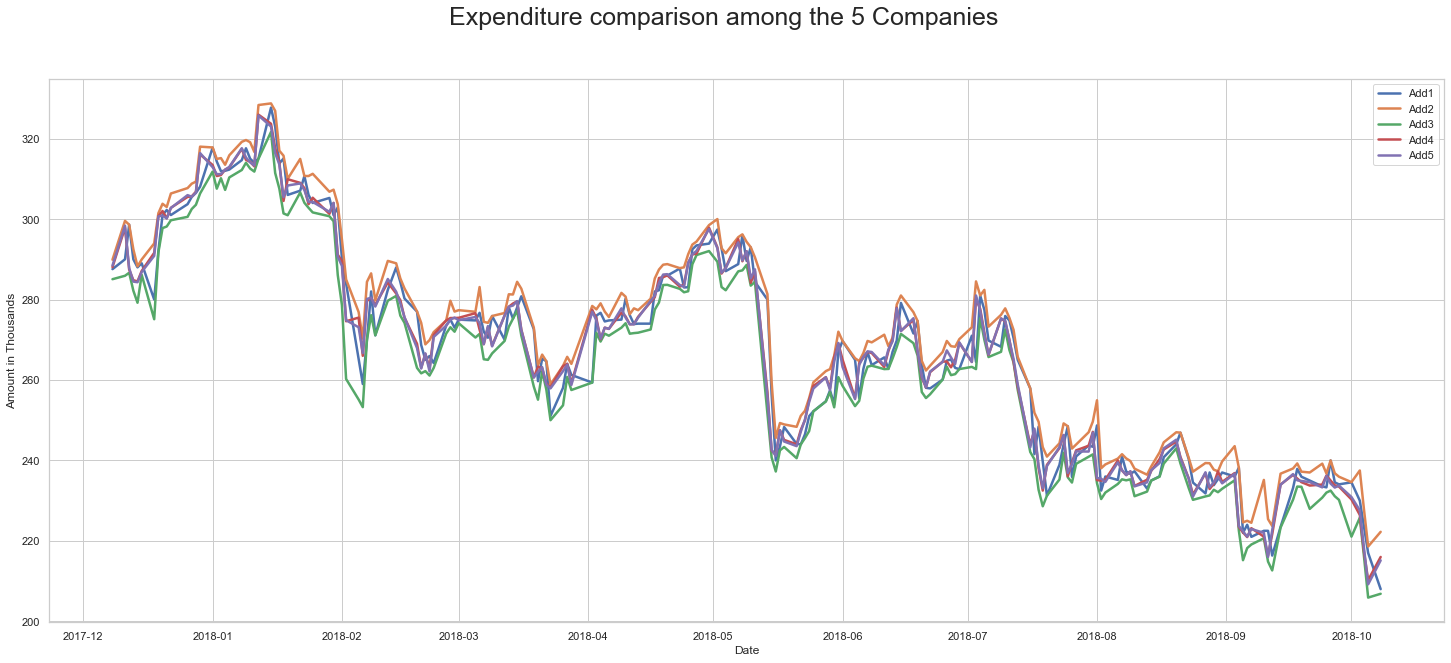

In [26]:
# Line plot comparing the expenditure
fig = plt.figure(figsize=(25,10))
fig.suptitle('Expenditure comparison among the 5 Companies', fontsize=25)
sns.set_theme(style="whitegrid")
sns.lineplot(data=AD_DATA_01, x='Date', y='Add1(in Thousands)', palette="tab10", linewidth=2.5)
sns.lineplot(data=AD_DATA_01, x='Date', y='Add2(in Thousands)', palette="tab10", linewidth=2.5)
sns.lineplot(data=AD_DATA_01, x='Date', y='Add3(in Thousands)', palette="tab10", linewidth=2.5)
sns.lineplot(data=AD_DATA_01, x='Date', y='Add4(in Thousands)', palette="tab10", linewidth=2.5)
sns.lineplot(data=AD_DATA_01, x='Date', y='Add5(in Thousands)', palette="tab10", linewidth=2.5)
plt.ylabel('Amount in Thousands')
plt.legend(labels=["Add1","Add2","Add3","Add4","Add5"])

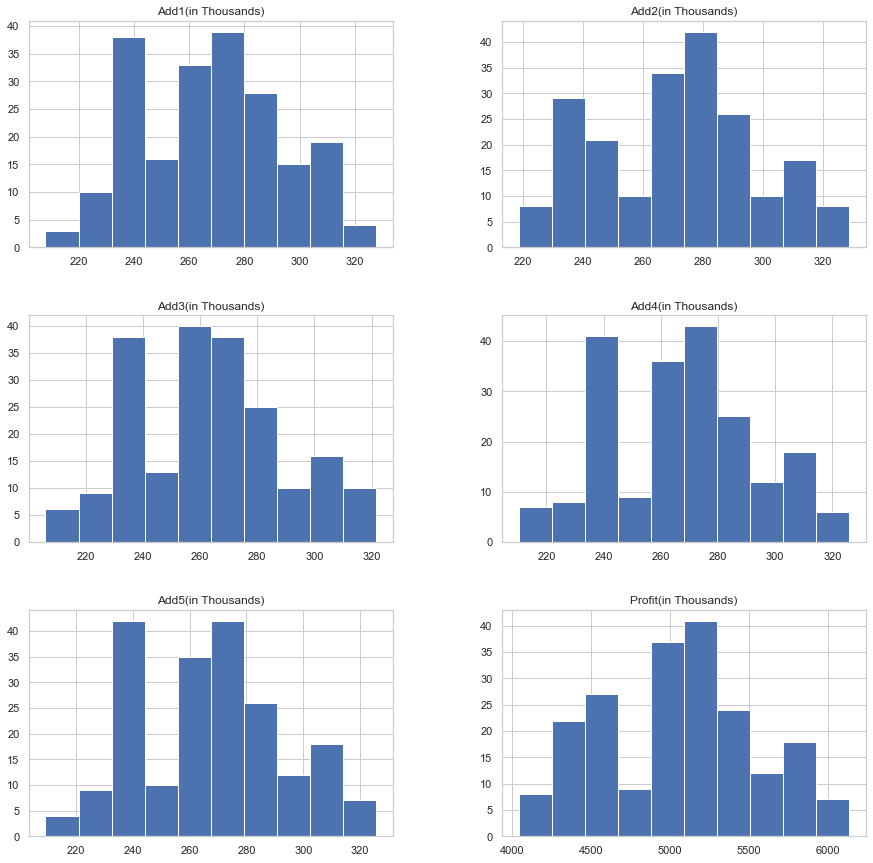

In [177]:
# Plotting Histograms for the feature set
frgraph = AD_DATA_01.select_dtypes(include=['float'])
frgraph.hist(figsize=(15,15))
plt.show()

<AxesSubplot:>

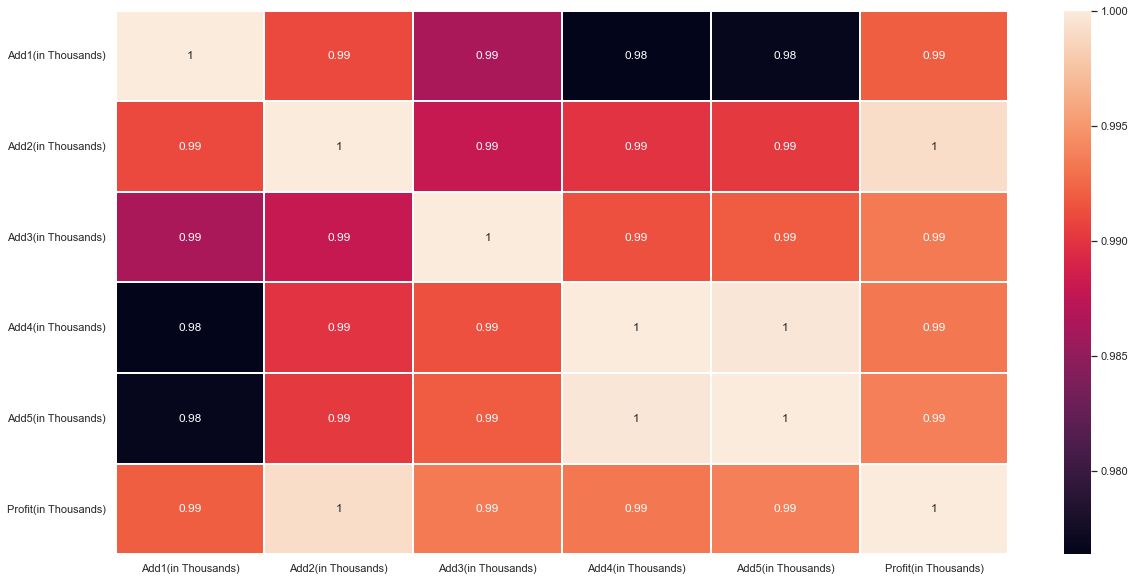

In [178]:
# Inspecting the correlation among the feature set and plotting the Heatmap using Seaborn
corrmatrix = AD_DATA_01.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix, annot=True, linewidth=0.1)

### Insights :
- Amount spend for advertising with 5 of the companies declined over time.
- Expenditure distribution is almost even for 5 of the companies.
- Talking about the relationship between the feature set, correlation coefficient ranges from 0.99 - 1.00 and second company exhibit a strong positive correlation with profit generated. But the difference is almost negligible. Because rest of the 4 company also shown a good performance with a correlation coefficient of 0.99.

## Q2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [12]:
# Defining Dependent variable in 'y' and Independent variables in 'X' Dataframes
y=AD_DATA['Profit(in Thousands)']
X=AD_DATA.drop(['Date','Profit(in Thousands)'], axis=1)
X.shape

(205, 5)

In [28]:
# Creating a regression model using scikit-learn library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.20)
from sklearn import linear_model
lm = linear_model.LinearRegression()
# Defining the model based on the training set
model = lm.fit(X_train, y_train)
# Predictions based on the test set
predictions = model.predict(X_test)

In [17]:
# Actual observations of the dependent variable 'Profit(in Thousands)'
y_test.to_frame().head(10)

,Profit(in Thousands)
15,4152.066
9,4446.441
100,5131.898
132,4907.560
68,5004.282
95,4623.793
159,5384.175
162,5328.025
147,5175.051
182,5956.323


In [34]:
# Predicted observations of the dependent variable 'Profit(in Thousands)' with Test data
predictions

array([4152.066, 4446.441, 5131.898, 4907.56 , 5004.282, 4623.793,
       5384.175, 5328.025, 5175.051, 5956.323, 5780.799, 4997.719,
       5075.858, 5784.54 , 4936.12 , 5065.652, 4190.965, 5034.726,
       5015.536, 5134.657, 5145.131, 5421.94 , 4569.293, 4598.292,
       4436.321, 4175.677, 5616.791, 5667.25 , 4648.834, 5717.838,
       5001.615, 5182.368, 5017.503, 5545.013, 5013.207, 5030.451,
       5108.626, 4760.877, 4606.34 , 4925.861, 5250.788])

In [30]:
# Testing the viability of the model with Mean squared error
from sklearn.metrics import mean_squared_error
print ('Mean Squared Error between the Actual and Predicted observation is', mean_squared_error(y_test, predictions))

Mean Squared Error between the Actual and Predicted observation is 3.429773271561334e-25


### Insights :
- The MSE for our model when comparing with the test data is 3.429773271561334e-25, which means the prediction accuracy of our model is incredible.
- For most of the cases the predicted profit amount is equal to the test data.

## Q3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
| Adv. Company | Target expenditure (In thousands) |
| :---         |               :---:               |
| Adv01        |                290                |
| Adv02        |                312                |
| Adv03        |                309                |
| Adv04        |                298                |
| Adv05        |                320                |

In [23]:
# Creating the required Dataframe using Pandas Library
sample = {'Add1(in Thousands)':[290], 'Add2(in Thousands)':[312], 'Add3(in Thousands)':[309], 'Add4(in Thousands)':[298], 'Add5(in Thousands)':[320]}
X_test_01 = pd.DataFrame(sample)
X_test_01

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,290,312,309,298,320


In [39]:
# Predicting the Profit using the above input
predictions = model.predict(X_test_01)
print('Predicted profit based on the input Data is', int(predictions), 'in thousands')

Predicted profit based on the input Data is 5820 in thousands


### Note :
- Model tested successful for future predictions.